In [1]:
from flask import Flask
import pymysql
import PIL
from PIL import Image
import io

In [2]:
app = Flask(__name__)
global img

In [3]:
@app.route('/getPhoto')
def getPhoto():
    print("==start==")
    try : 
        conn = pymysql.connect("--DB정보--")
        cursor = conn.cursor()
        
        sql = 'SELECT * FROM photo limit 1'
        cursor.execute(sql)
        data = cursor.fetchall()
        data_io = io.BytesIO(data[0][0])
        global img 
        img = Image.open(data_io)
        
        sql = '''INSERT INTO gojiseo VALUES('202202',6000,5000,4000,3000,2000,1000)'''
        cursor.execute(sql)
        conn.commit()
        
        conn.close()
        return "success"
    except Exception as e:
        print(e)
        return "fail"

@app.route('/getTest')
def getTest():
    return "success"

In [4]:
# 모든 host에서 접근 가능
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/May/2022 17:50:09] "GET /getPhoto HTTP/1.1" 200 -


==start==


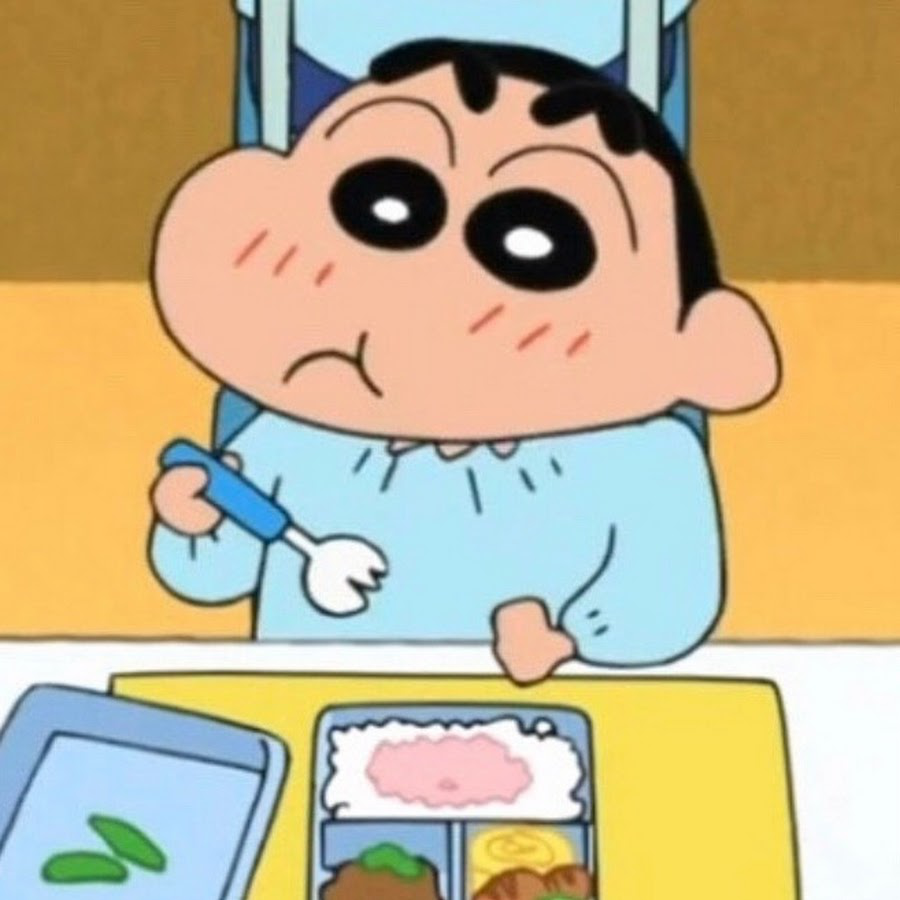

In [5]:
img